# Tarea Final Series de Tiempo - MCD - UC
---

### Importamos los datos

Tenemos 7 series de tiempo con el valor (CLP) de la UF diaria desde el 1 de enero de 2014 hasta el 9 de diciembre de 2024. La UF o unidad de fomento por su sigla, es una medida del valor de un bien o servicio, indexado a la medida de la inflación de Chile, dado por el IPC. 

Estos datos son rescatados desde el sitio web del Banco Central de Chile.

Link bases de datos: https://si3.bcentral.cl/Indicadoressiete/secure/Serie.aspx?gcode=UF&param=RABmAFYAWQB3AGYAaQBuAEkALQAzADUAbgBNAGgAaAAkADUAVwBQAC4AbQBYADAARwBOAGUAYwBjACMAQQBaAHAARgBhAGcAUABTAGUAYwBsAEMAMQA0AE0AawBLAF8AdQBDACQASABzAG0AXwA2AHQAawBvAFcAZwBKAEwAegBzAF8AbgBMAHIAYgBDAC4ARQA3AFUAVwB4AFIAWQBhAEEAOABkAHkAZwAxAEEARAA%3d

In [2]:
import pandas as pd

In [3]:
years = [
    2014,
    2015,
    2016,
    2017,
    2018,
    2019,
    2020,
    2021,
    2022,
    2023,
    2024
]

df = pd.DataFrame()

for y in years:
    year_df = pd.read_excel(f'../data/uf_{y}.xls', header=3)
    df = pd.concat([df, year_df], axis=0)

df.reset_index(drop=True, inplace=True)
df.info()

WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (76906) not 512 + multiple of sector size (512)
WARNING *** file size (75882) not 512 + multiple of sector size (512)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dia     3996 non-null   datetim

In [4]:
df

,Dia,Valor
0,2014-01-01,23312.57
1,2014-01-02,23315.57
2,2014-01-03,23318.57
3,2014-01-04,23321.57
4,2014-01-05,23324.58
...,...,...
3991,2024-12-05,38311.40
3992,2024-12-06,38324.11
3993,2024-12-07,38336.83
3994,2024-12-08,38349.54


### Descripción del dataset

* `Dia`: fecha en el cual se midió el valor de la UF, según el Banco Central de Chile. El dato está parseado como `datetime64` en nuestro dataset.
* `Valor`: Valor de una UF, en pesos chileno, para el día en cuestión. El dato está parseado como un `float64` en nuestro dataset.

##### Para efectos de nuestro análisis, manejaremos la serie de forma mensual, tomando el último valor del mes como el valor del mes

In [5]:
from datetime import timedelta

df['last_day_of_month'] = df['Dia'].apply(lambda x: True if (x + timedelta(days=1)).day == 1 else False)
month_df = df[df['last_day_of_month'] == True]
month_df['mes'] = month_df['Dia'].dt.to_period('M').dt.start_time

month_df = month_df[['mes', 'Valor']].reset_index(drop=True)
month_df


/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_22833/457773021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['mes'] = month_df['Dia'].dt.to_period('M').dt.start_time


,mes,Valor
0,2014-01-01,23435.87
1,2014-02-01,23508.46
2,2014-03-01,23606.97
3,2014-04-01,23773.41
4,2014-05-01,23931.69
...,...,...
126,2024-07-01,37578.95
127,2024-08-01,37754.47
128,2024-09-01,37910.42
129,2024-10-01,37971.42


## Análisis Exploratorio

In [6]:
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
uf_df = month_df.set_index(month_df['mes'])[['Valor']]
uf_df

,Valor
mes,
2014-01-01,23435.87
2014-02-01,23508.46
2014-03-01,23606.97
2014-04-01,23773.41
2014-05-01,23931.69
...,...
2024-07-01,37578.95
2024-08-01,37754.47
2024-09-01,37910.42


##### Transformamos la serie al formato que nos entrega la librería `darts` y graficamos

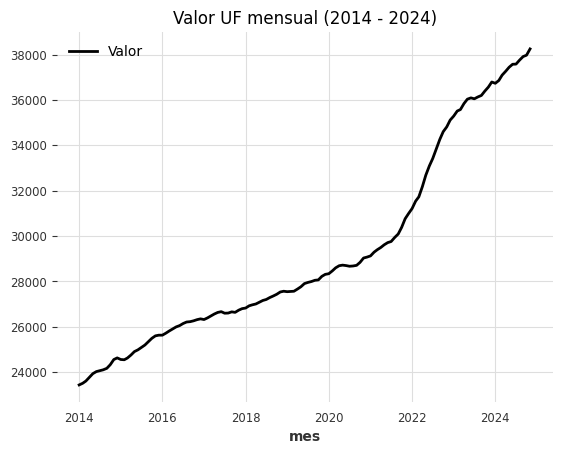

In [8]:
serie = TimeSeries.from_dataframe(uf_df)
serie.plot()
plt.title('Valor UF mensual (2014 - 2024)')
plt.show()


##### Es posible ver que hay una clara tendencia en los datos de la serie de la UF. En este caso, vemos que el precio de la UF ha ido aumentando de forma lineal entre el año 2014 y 2022, para luego tener una subida más pronunciada entre 2022 y 2023, pero luego volviendo a tener el crecimiento normal entre 2023 y 2024. Esto tiene concordancia con que en Chile se experimentó una alta inflación anual cercana al 14% entre 2022 y 2023, lo que elevó la tasa de crecimiento de la UF en dichos años. Dado que la tendencia podría tender a ser lineal, tiene más sentido que utilicemos una serie diferenciada para eliminar esta tendencia.

#### Creamos la serie diferenciada para eliminar la tendencia de la serie

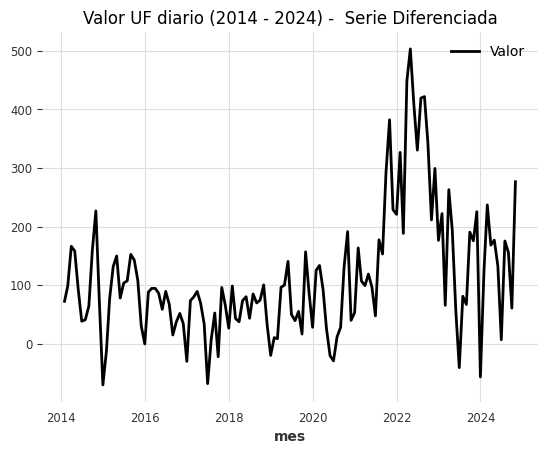

In [9]:
serie

diff_serie = serie.diff()
diff_serie.plot()

plt.title('Valor UF diario (2014 - 2024) -  Serie Diferenciada')
plt.show()

##### Se puede ver que la varianza tiende a descontrolarse en la serie para el año 2022, 2023 y 2024. Esto tiene que ver con los efectos anteriores de la inflación inusual experimentada en Chile entre dichos años. Debemos analizar la estacionariedad de la serie y revisar por medio del test de Dickey-Fuller. Quizás debemos diferenciar por segundo orden.

### Análisis de estacionariedad

##### Veremos si la serie cumple con el criterio de estacionariedad, es decir, si tenemos una media y varianza constante en la serie. Para lo anterior usamos el test de Dickey-Fuller en la serie original y en la serie diferenciada, en que buscaremos que el valor-p sea menor a 0.05 para rechazar la hipótesis nula de que la serie no es estacionaria.

In [10]:
from statsmodels.tsa.stattools import adfuller

##### Test estacionariedad serie original

In [11]:
adfuller_result_1 = adfuller(serie.pd_series())
pvalue_adfuller_1 = adfuller_result_1[1]
print(f'Valor p: {pvalue_adfuller_1}')

Valor p: 0.997723314040838


##### Vemos que la serie original no es estacionaria (valor-p 0.99 > 0.05). Ahora vemos la estacionariedad para la serie diferenciada y la serie diferenciada por segundo orden

In [12]:
adfuller_result_2 = adfuller(diff_serie.pd_series())
pvalue_adfuller_2 = adfuller_result_2[1]
print(f'Valor p: {pvalue_adfuller_2}')

Valor p: 0.09430174953513581


##### Tenemos un valor p mayor a 0.05, por lo tanto tenemos que nuestra serie diferenciada no es estacionaria. Diferenciamos por segundo orden para ver si logramos que sea estacionaria y así poder trabajar la serie de mejor forma.

<Axes: xlabel='mes'>

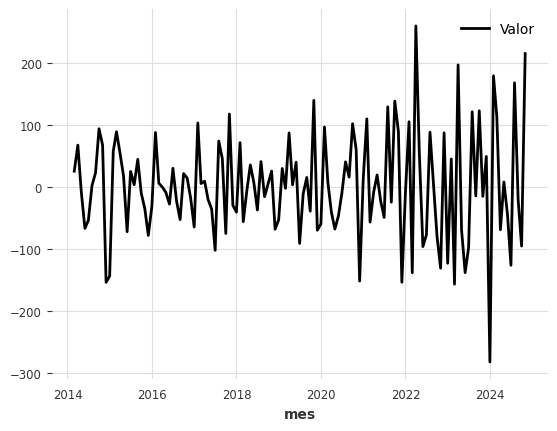

In [13]:
diff_2_serie = diff_serie.diff()
diff_2_serie.plot()

In [14]:
adfuller_result_3 = adfuller(diff_2_serie.pd_series())
pvalue_adfuller_3 = adfuller_result_3[1]
print(f'Valor p: {pvalue_adfuller_3}')

Valor p: 0.07129664514890789


##### Aún tenemos que la serie no es estacionaria. Procedemos a descomponer estacionalmente la serie y luego aplicar una diferenciación a los residuos

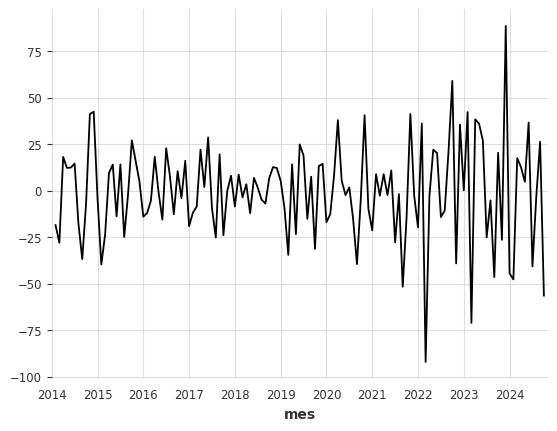

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposición de la serie en componentes estacionales
decomposition = seasonal_decompose(uf_df['Valor'], model='additive', period=3)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

residual.plot()
plt.show()

In [32]:
residual

mes
2014-01-01          NaN
2014-02-01   -18.595969
2014-03-01   -28.058295
2014-04-01    18.090930
2014-05-01    12.164031
                ...    
2024-07-01   -40.772403
2024-08-01    -3.432636
2024-09-01    26.235039
2024-10-01   -56.462403
2024-11-01          NaN
Name: resid, Length: 131, dtype: float64

##### Graficamos la serie residual diferenciada

<Axes: xlabel='mes'>

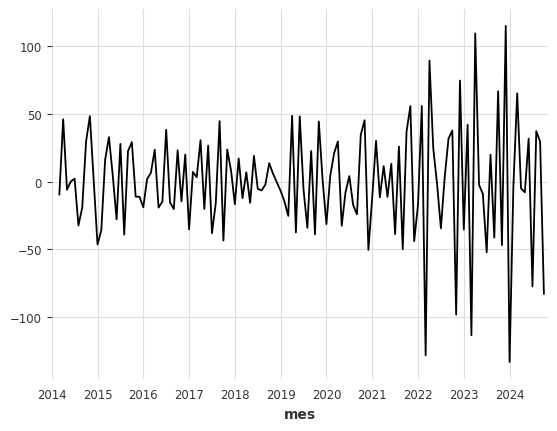

In [33]:
residual_diff = residual.diff()
residual_diff.plot()

##### Verificamos que esta serie sea estacionaria por medio del test Dickey-Fuller

In [34]:
adfuller_result_4 = adfuller(residual_diff.dropna())
pvalue_adfuller_4 = adfuller_result_4[1]
print(f'Valor p: {pvalue_adfuller_4}')

Valor p: 1.684733816458117e-10


##### Ahora sí, tenemos que la **serie residual diferenciada sí es estacionaria**, mientras que **nuestra serie original no es estacionaria**.

### Autocorrelación y autocorrelación Parcial

##### Ahora analizaremos la autocorrelación y autocorrelación parcial de la serie normal

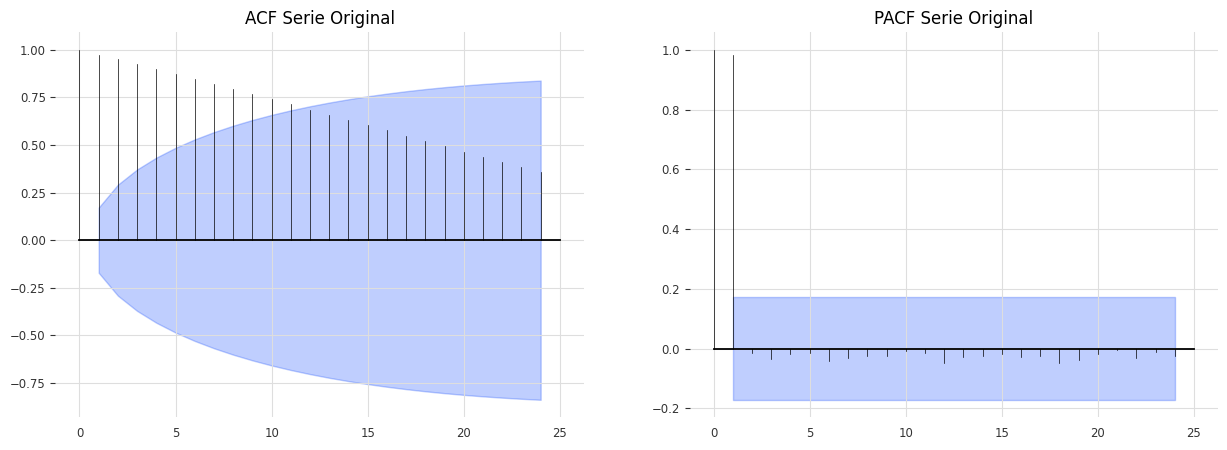

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie, axis=axes[0])
axes[0].set_title('ACF Serie Original')

plot_pacf(serie, axis=axes[1])
axes[1].set_title('PACF Serie Original')
plt.show()

#### Ahora analizaremos la autocorrelación y autocorrelación parcial de la serie transformada

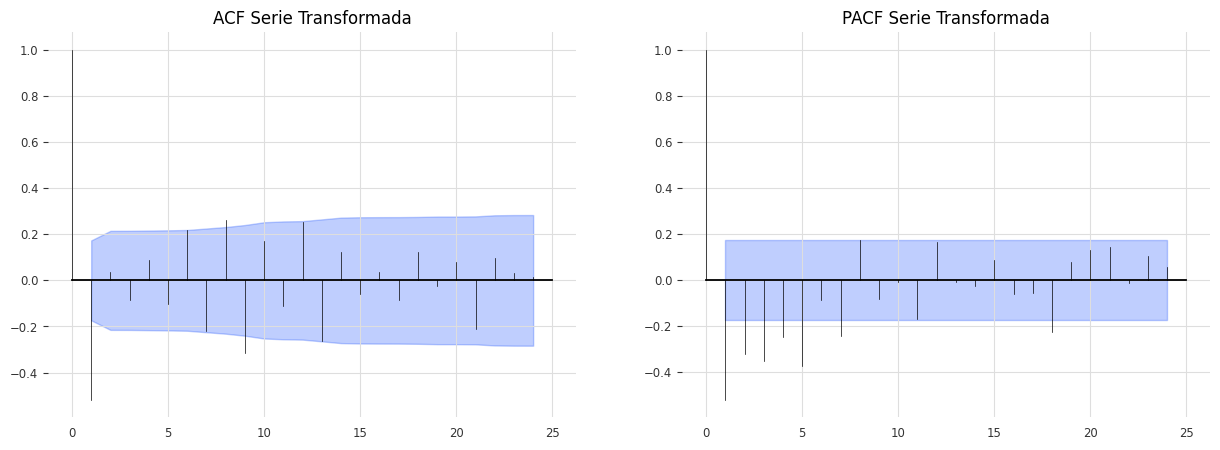

In [36]:
residual_diff_serie = TimeSeries.from_series(residual_diff.dropna())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(residual_diff_serie, axis=axes[0])
axes[0].set_title('ACF Serie Transformada')

plot_pacf(residual_diff_serie, axis=axes[1])
axes[1].set_title('PACF Serie Transformada')
plt.show()

##### Podemos ver que tanto en el ACF de la serie normal como la serie transformada, tenemos correlaciones significativas para `t=1` y `t=9`, lo que nos permite indicar que existe una dependencia temporal en la serie con rezago 1 y 9. Luego, en la autocorrelación parcial de la serie transformada podemos ver que hay rezagos significativos para `t=1`, `t=2`, `t=3`, `t=4` y `t=5`

##### Para comprobar estadísticamente lo comentado según las gráficas, ejecutamos una prueba de Ljung-Box en el que trataremos de rechazar la hipótesis nula, en que estamos ante ruido blanco e indicamos que hay autocorrelación significativa si el valor `p` es menor a 0.05

In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [38]:
ljung_box_serie_pvalue = acorr_ljungbox(serie.pd_series(), lags=[25], return_df=True)['lb_pvalue'][25]
print(ljung_box_serie_pvalue)

0.0


In [39]:
ljung_box_trans_pvalue = acorr_ljungbox(residual_diff_serie.pd_series(), lags=[25], return_df=True)['lb_pvalue'][25]
print(ljung_box_trans_pvalue)


8.271745248828943e-14


##### Podemos comprobar con esto que la serie transformada no es ruido blanco, sino que tiene dependencia temporal

## Propuesta de modelos a utilizar

##### Dado que validamos que tenemos una dependencia temporal, debemos considerar una componente autorregresiva en nuestros modelos. Para lo anterior, se podría considerar que debemos tener una **componente autorregresiva**, teniendo los rezagos 1, 2, 3, 4, 5 en la PACF serie transformada, por lo que se podría tener una componente `AR(1)`, `AR(2)`, `AR(3)`, `AR(4)` o `AR(5)`. 

##### Por otra parte, en la serie original podemos ver que claramente no es estacionaria al presentar una tendencia, además de que el ACF decae lentamente y presenta rezagos significativos al principio. De esta forma, podríamos aplicar al menos una diferenciación, teniendo `d=1`

##### Similarmente, en la serie transformada y el ACF podemos tener una componente `MA(1)`, `MA(9)`

##### Definimos los modelos con sus combinaciones, considerando un periodo 12

In [40]:
model_params_orders = {
    'model_1': (1, 1, 1),
    'model_2': (2, 1, 1),
    'model_3': (3, 1, 1),
    'model_4': (4, 1, 1),
    'model_5': (5, 1, 1),
    'model_6': (1, 1, 9),
    'model_7': (2, 1, 9),
    'model_8': (4, 1, 9),
}
s = 12


##### Definimos un set de entrenamiento y uno de validación con la serie transformada. Validaremos con todo el año 2024 y haremos predicciones para el año 2025.

In [41]:
residual_diff.dropna()

mes
2014-03-01    -9.462326
2014-04-01    46.149225
2014-05-01    -5.926899
2014-06-01     0.174341
2014-07-01     2.205891
                ...    
2024-06-01    31.834341
2024-07-01   -77.310775
2024-08-01    37.339767
2024-09-01    29.667674
2024-10-01   -82.697442
Name: resid, Length: 128, dtype: float64

In [42]:
uf = residual_diff.dropna()
uf_train = uf.loc[:'2022-12-01']
uf_val = uf.loc['2023-01-01':]

In [43]:
uf_train.shape, uf_val.shape 

((106,), (22,))

##### Instanciamos y entrenamos los modelos SARIMAX con las configuraciones

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
models = {}
for mod, order in model_params_orders.items():
    model = SARIMAX(uf_train, order=order, seasonal_order=(0, 0, 0, s))
    results = model.fit()
    models[mod] = {
        'model': results,
        'AIC': results.aic,
        'order': order,
    }

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency inf

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86861D+00    |proj g|=  1.95388D-01

At iterate    5    f=  4.82354D+00    |proj g|=  2.02300D-02

At iterate   10    f=  4.78718D+00    |proj g|=  1.13067D-03

At iterate   15    f=  4.78716D+00    |proj g|=  1.14230D-03

At iterate   20    f=  4.78707D+00    |proj g|=  5.25608D-05

At iterate   25    f=  4.78706D+00    |proj g|=  5.87455D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     34      1     0     0   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


At iterate    5    f=  4.69090D+00    |proj g|=  1.96614D-01

At iterate   10    f=  4.51847D+00    |proj g|=  4.07339D-02

At iterate   15    f=  4.50143D+00    |proj g|=  2.92489D-02

At iterate   20    f=  4.49014D+00    |proj g|=  1.68870D-02

At iterate   25    f=  4.46396D+00    |proj g|=  1.40039D-02

At iterate   30    f=  4.46217D+00    |proj g|=  1.23484D-02

At iterate   35    f=  4.46012D+00    |proj g|=  3.59841D-03

At iterate   40    f=  4.46008D+00    |proj g|=  8.06054D-04

At iterate   45    f=  4.46006D+00    |proj g|=  1.40221D-03

At iterate   50    f=  4.46000D+00    |proj g|=  1.51606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  4.47924D+00    |proj g|=  2.72207D-02

At iterate   15    f=  4.47235D+00    |proj g|=  2.81629D-02

At iterate   20    f=  4.46842D+00    |proj g|=  3.32836D-02

At iterate   25    f=  4.46228D+00    |proj g|=  1.94407D-02

At iterate   30    f=  4.46010D+00    |proj g|=  2.00211D-02

At iterate   35    f=  4.45408D+00    |proj g|=  3.63196D-02

At iterate   40    f=  4.44824D+00    |proj g|=  6.95155D-02

At iterate   45    f=  4.44578D+00    |proj g|=  3.55566D-02

At iterate   50    f=  4.44002D+00    |proj g|=  2.28289D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     57   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
models

{'model_1': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307b158d0>,
  'AIC': 1020.8573756469672,
  'order': (1, 1, 1)},
 'model_2': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3078862d0>,
  'AIC': 1008.0926023729847,
  'order': (2, 1, 1)},
 'model_3': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307864190>,
  'AIC': 1002.8918772301341,
  'order': (3, 1, 1)},
 'model_4': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3078da390>,
  'AIC': 991.2174479033636,
  'order': (4, 1, 1)},
 'model_5': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307a30590>,
  'AIC': 980.8552265914907,
  'order': (5, 1, 1)},
 'model_6': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307872690>,
  'AIC': 972.2388246469856,
  'order': (1, 1, 9)},
 'model_7': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3078bc910>,
  'AIC': 969

##### Ahora calculamos el RMSE realizando predicciones con los modelos entrenados.

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
for key, data in models.items():
    pred = data['model'].forecast(steps=len(uf_val)) 
    rmse = np.sqrt(mean_squared_error(uf_val, pred))
    models[key]['rmse'] = rmse

In [49]:
models_df = pd.DataFrame(models)
models_df

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8
model,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
AIC,1020.857376,1008.092602,1002.891877,991.217448,980.855227,972.238825,969.520686,969.285023
order,"(1, 1, 1)","(2, 1, 1)","(3, 1, 1)","(4, 1, 1)","(5, 1, 1)","(1, 1, 9)","(2, 1, 9)","(4, 1, 9)"
rmse,62.673101,66.602173,62.333028,66.991631,65.786378,59.110246,63.013846,64.466264


##### Con respecto al RMSE, el mejor modelo es el `(1, 1, 9) (0, 0, 0) (12)`; con respecto al AIC, el mejor modelo es el `(4, 1, 9) (0, 0, 0) (12)`

##### Ahora, utilizamos autorima para verificar si podemos obtener un mejor modelo

In [50]:
import pmdarima as pm

In [51]:
mod_autoarima = pm.auto_arima(uf_train,
                     m=1,
                     trace=True
                    )
aic_autoarima = mod_autoarima.aic()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=958.641, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1045.404, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1024.065, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1043.430, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=960.705, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=958.470, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0

In [52]:
order_autoarima = (2,0,2)

##### Realizamos predicciones con el modelo para calcular el RMSE

In [53]:
pred_autoarima = mod_autoarima.predict(n_periods=len(uf_val))
rmse_autoarima = np.sqrt(mean_squared_error(uf_val, pred_autoarima))
rmse_autoarima

64.32325111655535

In [54]:
models['model_autoarima'] = {
    'model': mod_autoarima,
    'AIC': aic_autoarima,
    'order': order_autoarima,
    'rmse': rmse_autoarima
}
models

{'model_1': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307b158d0>,
  'AIC': 1020.8573756469672,
  'order': (1, 1, 1),
  'rmse': 62.673101175081776},
 'model_2': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3078862d0>,
  'AIC': 1008.0926023729847,
  'order': (2, 1, 1),
  'rmse': 66.60217267229417},
 'model_3': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307864190>,
  'AIC': 1002.8918772301341,
  'order': (3, 1, 1),
  'rmse': 62.33302781325154},
 'model_4': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x3078da390>,
  'AIC': 991.2174479033636,
  'order': (4, 1, 1),
  'rmse': 66.99163108794718},
 'model_5': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307a30590>,
  'AIC': 980.8552265914907,
  'order': (5, 1, 1),
  'rmse': 65.78637785709203},
 'model_6': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x307872690>,
  'AIC': 972.2

In [55]:
models_df = pd.DataFrame(models)
models_df

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_autoarima
model,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,"ARIMA(2,0,2)(0,0,0)[0]"
AIC,1020.857376,1008.092602,1002.891877,991.217448,980.855227,972.238825,969.520686,969.285023,958.470037
order,"(1, 1, 1)","(2, 1, 1)","(3, 1, 1)","(4, 1, 1)","(5, 1, 1)","(1, 1, 9)","(2, 1, 9)","(4, 1, 9)","(2, 0, 2)"
rmse,62.673101,66.602173,62.333028,66.991631,65.786378,59.110246,63.013846,64.466264,64.323251


##### Considerando el modelo de autoarima, tenemos que el mejor modelo respecto a AIC sigue siendo el `(4, 1, 9) (0, 0, 0) (12)`, al igual que para el RMSE el mejor modelo sigue siendo el `(1, 1, 9) (0, 0, 0) (12)`

##### Considerando el mejor modelo como el `(1, 1, 9) (0, 0, 0) (12)`, el cual es el modelo 6, aplicamos las predicciones para todo 2025

In [77]:
modfinal_order = models['model_6']['order']

modfinal = SARIMAX(uf_train,
               order=modfinal_order,
               seasonal_order=(0, 0, 0, s)
              )
modfinal = modfinal.fit()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52753D+00    |proj g|=  1.12295D+00

At iterate    5    f=  4.59793D+00    |proj g|=  8.38518D-02

At iterate   10    f=  4.54210D+00    |proj g|=  1.35177D-02

At iterate   15    f=  4.52165D+00    |proj g|=  3.29665D-02

At iterate   20    f=  4.49114D+00    |proj g|=  6.39618D-02

At iterate   25    f=  4.48227D+00    |proj g|=  6.00727D-03

At iterate   30    f=  4.48226D+00    |proj g|=  1.55271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [79]:
preds_final = modfinal.forecast(steps=22)
preds_final

2023-01-01   -59.986097
2023-02-01    47.550094
2023-03-01   -10.357481
2023-04-01     6.768670
2023-05-01     0.698937
2023-06-01    12.271708
2023-07-01   -18.944129
2023-08-01    20.686475
2023-09-01   -15.730327
2023-10-01    12.595875
2023-11-01    -9.437189
2023-12-01     7.700863
2024-01-01    -5.629685
2024-02-01     4.739260
2024-03-01    -3.326051
2024-04-01     2.947416
2024-05-01    -1.932296
2024-06-01     1.863307
2024-07-01    -1.089040
2024-08-01     1.207394
2024-09-01    -0.578849
2024-10-01     0.810550
Freq: MS, Name: predicted_mean, dtype: float64

#### Aplicamos la transformación inversa

In [81]:
pred_inverse_diff = preds_final.cumsum()

In [85]:
fixed_trend = [trend[i] for i in pred_inverse_diff.index.astype(str) if i in trend.index]
fixed_seasonal = [seasonal[i] for i in pred_inverse_diff.index.astype(str) if i in seasonal.index]

In [94]:
preds_real = [
    fixed_trend[i] +
    fixed_seasonal[i] +
    pred_inverse_diff[i] 
    for i in range(len(pred_inverse_diff))
]

preds_real

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_22833/151442660.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_inverse_diff[i]


[35227.36297325247,
 35455.07330030013,
 35623.85814520994,
 35784.2442575346,
 35981.60342701237,
 36059.500794045234,
 36052.24410723007,
 36134.274147660675,
 36227.00947972273,
 36363.33946356898,
 36576.505840402366,
 36694.65569559472,
 36765.78345221027,
 36897.236277647055,
 37065.68255184005,
 37241.98074336791,
 37424.822013256475,
 37527.80097910196,
 37611.112714728355,
 37750.50034124954,
 37876.2038182364,
 38020.71181051268]

### Obtenemos el dataset con el valor real versus las predicciones

In [105]:
predictions_df = uf_df.loc['2023-01-01':'2024-10-01']
predictions_df['Predicciones'] = preds_real
predictions_df

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_22833/2873979751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['Predicciones'] = preds_real


,Valor,Predicciones
mes,,
2023-01-01,35287.50,35227.362973
2023-02-01,35509.68,35455.073300
2023-03-01,35575.48,35623.858145
2023-04-01,35838.55,35784.244258
2023-05-01,36032.89,35981.603427
2023-06-01,36089.48,36059.500794
2023-07-01,36049.05,36052.244107
2023-08-01,36130.31,36134.274148
2023-09-01,36197.53,36227.009480


### Finalmente, calculamos el RMSE

In [107]:
predictions_df

,Valor,Predicciones
mes,,
2023-01-01,35287.50,35227.362973
2023-02-01,35509.68,35455.073300
2023-03-01,35575.48,35623.858145
2023-04-01,35838.55,35784.244258
2023-05-01,36032.89,35981.603427
2023-06-01,36089.48,36059.500794
2023-07-01,36049.05,36052.244107
2023-08-01,36130.31,36134.274148
2023-09-01,36197.53,36227.009480


In [108]:
rmse_final = np.sqrt(mean_squared_error(predictions_df['Valor'], predictions_df['Predicciones']))
rmse_final

40.870567216342764